## Bagging (bootstrapping aggregating)

In [20]:
# import wine data
import pandas as pd
df_wine = pd.read_csv('wine.data',header=None)

In [21]:
df_wine.columns=['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids'
                ,'Nonflavanoid phenols','Proanthocynins','Color intensity','Hue','OD280/OD315 of diluted wines',
                'Proline']

In [22]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocynins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
df_wine['Class label'].value_counts()

Class label
2    71
1    59
3    48
Name: count, dtype: int64

In [25]:
df_wine = df_wine[df_wine['Class label'] !=1] # drop class 1
y = df_wine['Class label'].values
X = df_wine[['Alcohol','OD280/OD315 of diluted wines']].values

In [26]:
df_wine['Class label'].value_counts()

Class label
2    71
3    48
Name: count, dtype: int64

In [28]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

In [29]:
# encode the data and split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [30]:
le = LabelEncoder()
y = le.fit_transform(y)

In [31]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [8]:
# Use sklearn bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)

In [35]:
bag = BaggingClassifier(estimator=tree, n_estimators=500, max_features=1.0,max_samples=.8,
                        bootstrap=True,bootstrap_features=False,n_jobs=1,random_state=1)

In [33]:
# Compare a single tree and a bagging classifier
tree = tree.fit(X_train,y_train)
y_test_pred = tree.predict(X_test)
tree_test = accuracy_score(y_test,y_test_pred)
print('Decision tree test accuracies %.3f' % (tree_test))

Decision tree test accuracies 0.875


In [36]:
bag = bag.fit(X_train, y_train)
y_test_pred = bag.predict(X_test)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging test accuracies %.3f' % (bag_test))

Bagging test accuracies 0.917


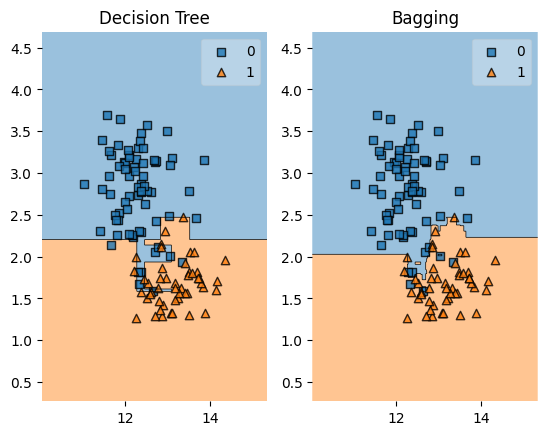

In [13]:
# Plot decision regions
#from Perceptron import plot_decision_regions
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plt.subplot(121)
plot_decision_regions(X,y,clf=tree)
plt.title('Decision Tree')

plt.subplot(122)
plot_decision_regions(X,y,clf=bag)
plt.title('Bagging')
plt.show()


## Adaboost

In [14]:
# import classifier
from sklearn.ensemble import AdaBoostClassifier
#from Decision_tree import Decision_Tree
import numpy as np

In [15]:
# weak learner is a stump (simplest tree with depth 1)
tree = DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=1)
#tree_own = Decision_Tree(max_depth=3,impurity_fun='entropy')
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, random_state=1,learning_rate=0.1)

In [16]:
tree.fit(X_train,y_train)
#tree_own.fit(X_train,y_train,np.ones(y_train.shape)/len(y_train))
ada.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=500, random_state=1)

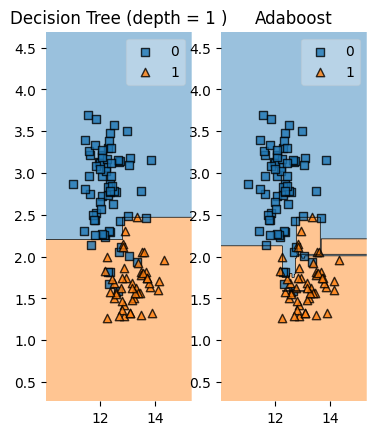

In [17]:
plt.subplot(131)
plot_decision_regions(X,y,clf=tree)
plt.title('Decision Tree (depth = 1 )')

plt.subplot(132)
plot_decision_regions(X,y,clf=ada)
plt.title('Adaboost')
plt.show()